# Transformer
A transformer is a deep learning architecture introduced in the paper titled "Attention is All You Need" by Vaswani et al. in 2017. Transformers have had a significant impact on various fields of artificial intelligence, especially in Natural Language Processing (NLP). They are a type of neural network architecture designed to handle sequential data efficiently, making them particularly well-suited for tasks involving language understanding, generation, and translation.

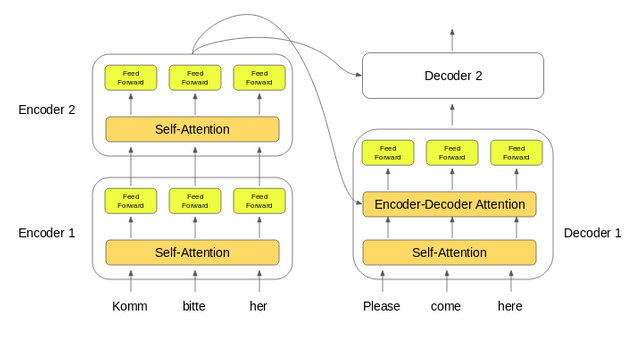

Key components and concepts of a transformer architecture include:

1. Self-Attention Mechanism: The central innovation of transformers is the self-attention mechanism, which allows the model to weigh the importance of different elements (e.g., words in a sentence) in relation to each other. This mechanism captures dependencies and relationships between elements in a sequence efficiently, making it well-suited for modeling sequential data.

2. Multi-Head Attention: Transformers often employ multiple attention heads in parallel. Each attention head learns a different aspect of relationships within the input sequence, making the model more expressive and capable of capturing various types of information.

3. Positional Encoding: Since transformers don't inherently understand the order of elements in a sequence (unlike recurrent neural networks), positional encodings are added to the input embeddings to provide information about the positions of elements in the sequence.

4. Stacked Layers: Transformers consist of multiple layers stacked on top of each other. Each layer typically contains a multi-head self-attention mechanism followed by a feedforward neural network. Stacking multiple layers enables the model to learn increasingly abstract and complex representations of the input data.

5. Encoder-Decoder Architecture: In some applications, transformers are used in an encoder-decoder architecture. The encoder processes the input sequence, and the decoder generates the output sequence. This architecture is commonly used in machine translation and sequence-to-sequence tasks.

6. Attention Masks: Transformers can utilize attention masks to control which parts of the input sequence each element attends to. This is useful for tasks where selective attention to specific elements is required.

7. Pretraining and Fine-Tuning: Pretraining on large text corpora is a common practice for transformers. Models like BERT (Bidirectional Encoder Representations from Transformers) and GPT (Generative Pre-trained Transformer) are pretrained on massive amounts of text data and can then be fine-tuned on specific downstream tasks to achieve state-of-the-art performance.

In [1]:
# Transformers installation
! pip install transformers datasets



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.9 MB/s eta 0:00:00


# Quick tour

Let's have a quick look at the 🤗 Transformers library features. The library downloads pretrained models for Natural
Language Understanding (NLU) tasks, such as analyzing the sentiment of a text, and Natural Language Generation (NLG),
such as completing a prompt with new text or translating in another language.

First we will see how to easily leverage the pipeline API to quickly use those pretrained models at inference. Then, we
will dig a little bit more and see how the library gives you access to those models and helps you preprocess your data.

> **NOTE:** All code examples presented in the documentation have a switch on the top left for Pytorch versus TensorFlow. If
> not, the code is expected to work for both backends without any change needed.

## Getting started on a task with a pipeline

The easiest way to use a pretrained model on a given task is to use `pipeline`.

🤗 Transformers provides the following tasks out of the box:

- Sentiment analysis: is a text positive or negative?
- Text generation (in English): provide a prompt and the model will generate what follows.
- Name entity recognition (NER): in an input sentence, label each word with the entity it represents (person, place,
  etc.)
- Question answering: provide the model with some context and a question, extract the answer from the context.
- Filling masked text: given a text with masked words (e.g., replaced by `[MASK]`), fill the blanks.
- Summarization: generate a summary of a long text.
- Translation: translate a text in another language.
- Feature extraction: return a tensor representation of the text.

Let's see how this work for sentiment analysis (the other tasks are all covered in the [task summary](https://huggingface.co/transformers/task_summary.html)):

In [11]:
# Import the 'pipeline' function from the 'transformers' library.
from transformers import pipeline

# Create a sentiment analysis pipeline using the 'pipeline' function.
# This pipeline will use a pre-trained sentiment analysis model.
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')


When typing this command for the first time, a pretrained model and its tokenizer are downloaded and cached. We will
look at both later on, but as an introduction the tokenizer's job is to preprocess the text for the model, which is
then responsible for making predictions. The pipeline groups all of that together, and post-process the predictions to
make them readable. For instance:

In [3]:
# Use the 'classifier' pipeline to perform sentiment analysis on the given text.
result = classifier('We are very happy to show you the 🤗 Transformers library.')

# 'result' contains the sentiment analysis output for the provided text.
result

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

That's encouraging! You can use it on a list of sentences, which will be preprocessed then fed to the model as a
*batch*, returning a list of dictionaries like this one:

In [13]:
# Use the 'classifier' pipeline to perform sentiment analysis on a list of text samples.
results = classifier(["We are very happy to show you the 🤗 Transformers library.",
                      "We hope you don't hate it.",
                      "The weather today is absolutely fantastic, and I'm in a great mood!"

                      ])

# Iterate through the results obtained from the sentiment analysis.
for result in results:
    # Print the sentiment label and associated score for each text sample.
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")


label: POSITIVE, with score: 0.9998
label: NEGATIVE, with score: 0.5309
label: POSITIVE, with score: 0.9999


You can see the second sentence has been classified as negative (it needs to be positive or negative) but its score is
fairly neutral.

By default, the model downloaded for this pipeline is called "distilbert-base-uncased-finetuned-sst-2-english". We can
look at its [model page](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) to get more
information about it. It uses the [DistilBERT architecture](https://huggingface.co/transformers/model_doc/distilbert.html) and has been fine-tuned on a
dataset called SST-2 for the sentiment analysis task.

Let's say we want to use another model; for instance, one that has been trained on French data. We can search through
the [model hub](https://huggingface.co/models) that gathers models pretrained on a lot of data by research labs, but
also community models (usually fine-tuned versions of those big models on a specific dataset). Applying the tags
"French" and "text-classification" gives back a suggestion "nlptown/bert-base-multilingual-uncased-sentiment". Let's
see how we can use it.

You can directly pass the name of the model to use to `pipeline`:

In [7]:
# Create a sentiment analysis pipeline using the 'pipeline' function.
# Specify the model to be used for sentiment analysis.
# In this case, the 'nlptown/bert-base-multilingual-uncased-sentiment' model is chosen.
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")


This classifier can now deal with texts in English, French, but also Dutch, German, Italian and Spanish! You can also
replace that name by a local folder where you have saved a pretrained model (see below). You can also pass a model
object and its associated tokenizer.

We will need two classes for this. The first is `AutoTokenizer`, which we will use to download the
tokenizer associated to the model we picked and instantiate it. The second is
`AutoModelForSequenceClassification` (or
`TFAutoModelForSequenceClassification` if you are using TensorFlow), which we will use to download
the model itself. Note that if we were using the library on an other task, the class of the model would change. The
[task summary](https://huggingface.co/transformers/task_summary.html) tutorial summarizes which class is used for which task.

In [ ]:
## PYTORCH CODE
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [15]:
## TENSORFLOW CODE
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

Now, to download the models and tokenizer we found previously, we just have to use the
`AutoModelForSequenceClassification.from_pretrained` method (feel free to replace `model_name` by
any other model from the model hub):

In [ ]:
## PYTORCH CODE
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [16]:
## TENSORFLOW CODE

# Define the name of the pre-trained model to be used.
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

# Since the specified model is originally in PyTorch, we use the `from_pt` flag
# to import it into TensorFlow for compatibility.
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)

# Create a tokenizer that corresponds to the selected pre-trained model.
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Create a sentiment analysis pipeline using TensorFlow-based model and tokenizer.
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


If you don't find a model that has been pretrained on some data similar to yours, you will need to fine-tune a
pretrained model on your data. We provide [example scripts](https://huggingface.co/transformers/examples.html) to do so. Once you're done, don't forget
to share your fine-tuned model on the hub with the community, using [this tutorial](https://huggingface.co/transformers/model_sharing.html).

<a id='pretrained-model'></a>

## Under the hood: pretrained models

Let's now see what happens beneath the hood when using those pipelines.

As we saw, the model and tokenizer are created using the `from_pretrained` method:

In [ ]:
## PYTORCH CODE
from transformers import AutoTokenizer, AutoModelForSequenceClassification
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
pt_model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [17]:
## TENSORFLOW CODE

# Import necessary modules from the 'transformers' library.
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Define the name of the pre-trained model to be used.
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

# Load a pre-trained sequence classification model in TensorFlow.
tf_model = TFAutoModelForSequenceClassification.from_pretrained(model_name)

# Create a tokenizer that corresponds to the selected pre-trained model.
tokenizer = AutoTokenizer.from_pretrained(model_name)


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


### Using the tokenizer

We mentioned the tokenizer is responsible for the preprocessing of your texts. First, it will split a given text in
words (or part of words, punctuation symbols, etc.) usually called *tokens*. There are multiple rules that can govern
that process (you can learn more about them in the [tokenizer summary](https://huggingface.co/transformers/tokenizer_summary.html)), which is why we need
to instantiate the tokenizer using the name of the model, to make sure we use the same rules as when the model was
pretrained.

The second step is to convert those *tokens* into numbers, to be able to build a tensor out of them and feed them to
the model. To do this, the tokenizer has a *vocab*, which is the part we download when we instantiate it with the
`from_pretrained` method, since we need to use the same *vocab* as when the model was pretrained.

To apply these steps on a given text, we can just feed it to our tokenizer:

In [18]:
# Tokenize the input text using the previously created tokenizer.
input_text = "We are very happy to show you the 🤗 Transformers library."
inputs = tokenizer(input_text)


This returns a dictionary string to list of ints. It contains the [ids of the tokens](https://huggingface.co/transformers/glossary.html#input-ids), as
mentioned before, but also additional arguments that will be useful to the model. Here for instance, we also have an
[attention mask](https://huggingface.co/transformers/glossary.html#attention-mask) that the model will use to have a better understanding of the
sequence:

In [19]:
# Print the tokenized input, which is represented as a dictionary.
print(inputs)

# The 'inputs' dictionary contains the following key-value pairs:

# 'input_ids': This key maps to a list of integers. These integers represent the token IDs of the input text.
# These IDs are what the model uses to understand the text.
# Example: 'input_ids': [101, 2057, 2024, 2200, 3407, 2000, 2265, 2017, 1996, 100, 30101, 30755, 4954, 1012, 102]

# 'attention_mask': This key maps to a list of ones and zeros, indicating which tokens the model should pay attention to.
# A value of 1 means the token is attended to, while 0 means it is not.
# Example: 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Other possible keys, not present in this example:
# 'token_type_ids': If the model expects segment embeddings (e.g., for question-answering tasks), this key contains segment IDs.
# 'special_tokens_mask': This key may indicate special tokens like [CLS] and [SEP] if present in the model's tokenizer.
# 'overflowing_tokens': If the input is longer than the model's maximum sequence length, this key contains overflow tokens.

# These token IDs and attention masks are used as input to the model for further processing.


{'input_ids': [101, 2057, 2024, 2200, 3407, 2000, 2265, 2017, 1996, 100, 19081, 3075, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


You can pass a list of sentences directly to your tokenizer. If your goal is to send them through your model as a
batch, you probably want to pad them all to the same length, truncate them to the maximum length the model can accept
and get tensors back. You can specify all of that to the tokenizer:

In [ ]:
## PYTORCH CODE
pt_batch = tokenizer(
    ["We are very happy to show you the 🤗 Transformers library.", "We hope you don't hate it."],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="pt"
)

In [20]:
## TENSORFLOW CODE

# Use the tokenizer to process a batch of text sequences.
# You provide a list of input texts for processing.

# The 'padding=True' argument ensures that sequences are padded to have the same length.
# This is useful when working with sequences of different lengths.

# The 'truncation=True' argument allows the tokenizer to truncate sequences that exceed the specified 'max_length'.

# The 'max_length=512' argument defines the maximum sequence length allowed after truncation.
# If a sequence is longer than this value, it will be truncated to fit.

# The 'return_tensors="tf"' argument specifies that the tokenizer should return TensorFlow tensors.
# This is useful for compatibility with TensorFlow-based models.

tf_batch = tokenizer(
    ["We are very happy to show you the 🤗 Transformers library.", "We hope you don't hate it."],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="tf"
)


The padding is automatically applied on the side expected by the model (in this case, on the right), with the padding
token the model was pretrained with. The attention mask is also adapted to take the padding into account:

In [ ]:
## PYTORCH CODE
for key, value in pt_batch.items():
    print(f"{key}: {value.numpy().tolist()}")

input_ids: [[101, 2057, 2024, 2200, 3407, 2000, 2265, 2017, 1996, 100, 19081, 3075, 1012, 102], [101, 2057, 3246, 2017, 2123, 1005, 1056, 5223, 2009, 1012, 102, 0, 0, 0]]
attention_mask: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]]


In [21]:
## TENSORFLOW CODE

# Iterate through the key-value pairs in the 'tf_batch' dictionary.
for key, value in tf_batch.items():
    # Convert the TensorFlow tensors to NumPy arrays and then to lists for better readability.
    value_list = value.numpy().tolist()

    # Print the key (tensor name) and its corresponding values (as lists).
    print(f"{key}: {value_list}")


input_ids: [[101, 2057, 2024, 2200, 3407, 2000, 2265, 2017, 1996, 100, 19081, 3075, 1012, 102], [101, 2057, 3246, 2017, 2123, 1005, 1056, 5223, 2009, 1012, 102, 0, 0, 0]]
attention_mask: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]]


You can learn more about tokenizers [here](https://huggingface.co/transformers/preprocessing.html).

### Using the model

Once your input has been preprocessed by the tokenizer, you can send it directly to the model. As we mentioned, it will
contain all the relevant information the model needs. If you're using a TensorFlow model, you can pass the dictionary
keys directly to tensors, for a PyTorch model, you need to unpack the dictionary by adding `**`.

In [ ]:
## PYTORCH CODE
pt_outputs = pt_model(**pt_batch)

In [22]:
## TENSORFLOW CODE
# Use the TensorFlow-based model to process the 'tf_batch' input.
tf_outputs = tf_model(tf_batch)

# 'tf_outputs' now contains the model's output, which may include predictions, scores, or other relevant information.

In 🤗 Transformers, all outputs are objects that contain the model's final activations along with other metadata. These
objects are described in greater detail [here](https://huggingface.co/transformers/main_classes/output.html). For now, let's inspect the output ourselves:

In [ ]:
## PYTORCH CODE
print(pt_outputs)

SequenceClassifierOutput(loss=None, logits=tensor([[-4.0833,  4.3364],
        [ 0.0818, -0.0418]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [24]:
## TENSORFLOW CODE
print(tf_outputs)

TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-4.0832963 ,  4.336415  ],
       [ 0.08181015, -0.04178584]], dtype=float32)>, hidden_states=None, attentions=None)


Notice how the output object has a `logits` attribute. You can use this to access the model's final activations.

> **NOTE:** All 🤗 Transformers models (PyTorch or TensorFlow) return the activations of the model **before** the final activation
> function (like SoftMax) since this final activation function is often fused with the loss.

Let's apply the SoftMax activation to get predictions.

In [ ]:
## PYTORCH CODE
from torch import nn
pt_predictions = nn.functional.softmax(pt_outputs.logits, dim=-1)

In [25]:
## TENSORFLOW CODE
# Import the TensorFlow library.
import tensorflow as tf

# Apply the softmax function to the logits in 'tf_outputs'.
# The 'axis=-1' argument specifies that the softmax operation should be applied along the last dimension,
# which is typically used when dealing with probability distributions over classes.

softmax_output = tf.nn.softmax(tf_outputs.logits, axis=-1)

# 'softmax_output' now contains the probabilities associated with each class or category.
# These probabilities represent the model's confidence in its predictions.

We can see we get the numbers from before:

In [ ]:
## PYTORCH CODE
print(pt_predictions)

tensor([[2.2043e-04, 9.9978e-01],
        [5.3086e-01, 4.6914e-01]], grad_fn=<SoftmaxBackward0>)


In [27]:
## TENSORFLOW CODE
print(softmax_output)

tf.Tensor(
[[2.2042972e-04 9.9977952e-01]
 [5.3085971e-01 4.6914026e-01]], shape=(2, 2), dtype=float32)


If you provide the model with labels in addition to inputs, the model output object will also contain a `loss`
attribute:

In [ ]:
## PYTORCH CODE
import torch
pt_outputs = pt_model(**pt_batch, labels = torch.tensor([1, 0]))
print(pt_outputs)

SequenceClassifierOutput(loss=tensor(0.3167, grad_fn=<NllLossBackward0>), logits=tensor([[-4.0833,  4.3364],
        [ 0.0818, -0.0418]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [29]:
## TENSORFLOW CODE
# Import the TensorFlow library.
import tensorflow as tf

# Use the TensorFlow-based model to process 'tf_batch' input and provide labels for supervised training.
# In this example, we're using labels [1, 0] for the batch.
tf_outputs = tf_model(tf_batch, labels=tf.constant([1, 0]))

# 'tf_outputs' now contains the model's output, which may include loss, logits, or other relevant information.
# The model is being used in a supervised learning context with provided labels.
print(tf_outputs)


TFSequenceClassifierOutput(loss=<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.2051287e-04, 6.3325751e-01], dtype=float32)>, logits=<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-4.0832963 ,  4.336415  ],
       [ 0.08181015, -0.04178584]], dtype=float32)>, hidden_states=None, attentions=None)


Models are standard [torch.nn.Module](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) or [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model) so you can use them in your usual training loop. 🤗
Transformers also provides a `Trainer` (or `TFTrainer` if you are using
TensorFlow) class to help with your training (taking care of things such as distributed training, mixed precision,
etc.). See the [training tutorial](https://huggingface.co/transformers/training.html) for more details.

> **NOTE:** Pytorch model outputs are special dataclasses so that you can get autocompletion for their attributes in an IDE.
> They also behave like a tuple or a dictionary (e.g., you can index with an integer, a slice or a string) in which
> case the attributes not set (that have `None` values) are ignored.

Once your model is fine-tuned, you can save it with its tokenizer in the following way:

In [ ]:
# Save the pre-trained tokenizer to a specified directory.
# This step allows you to persist the tokenizer's configuration and vocabulary.
tokenizer.save_pretrained(save_directory)

# Save the pre-trained model to the same specified directory.
# This step allows you to persist the model's architecture and learned weights.
model.save_pretrained(save_directory)


You can then load this model back using the `AutoModel.from_pretrained` method by passing the
directory name instead of the model name. One cool feature of 🤗 Transformers is that you can easily switch between
PyTorch and TensorFlow: any model saved as before can be loaded back either in PyTorch or TensorFlow. If you are
loading a saved PyTorch model in a TensorFlow model, use `TFAutoModel.from_pretrained` like this:

In [ ]:
# Import the necessary modules from the 'transformers' library.
from transformers import TFAutoModel, AutoTokenizer

# Load the pre-trained tokenizer from a specified directory.
# This is useful for reusing a previously saved tokenizer's configuration and vocabulary.
tokenizer = AutoTokenizer.from_pretrained(save_directory)

# Load the pre-trained model from the same specified directory.
# The 'from_pt=True' flag is used to indicate that the model was originally trained in PyTorch and needs to be converted for TensorFlow.
model = TFAutoModel.from_pretrained(save_directory, from_pt=True)


and if you are loading a saved TensorFlow model in a PyTorch model, you should use the following code:

In [ ]:
# Import the necessary module from the 'transformers' library.
from transformers import AutoModel, AutoTokenizer

# Load the pre-trained tokenizer from a specified directory.
# This allows you to reuse a previously saved tokenizer's configuration and vocabulary.
tokenizer = AutoTokenizer.from_pretrained(save_directory)

# Load the pre-trained model from the same specified directory.
# The 'from_tf=True' flag is used to indicate that the model was originally trained in TensorFlow.
model = AutoModel.from_pretrained(save_directory, from_tf=True)


Lastly, you can also ask the model to return all hidden states and all attention weights if you need them:

In [ ]:
## PYTORCH CODE
pt_outputs = pt_model(**pt_batch, output_hidden_states=True, output_attentions=True)
all_hidden_states  = pt_outputs.hidden_states
all_attentions = pt_outputs.attentions

In [ ]:
## TENSORFLOW CODE
# Use the TensorFlow-based model to process 'tf_batch' input while requesting additional outputs.
# Setting 'output_hidden_states=True' and 'output_attentions=True' will include hidden states and attention weights in the output.
tf_outputs = tf_model(tf_batch, output_hidden_states=True, output_attentions=True)

# 'tf_outputs' now contains various model outputs, including hidden states and attention weights.
# These outputs can be useful for tasks like interpretability and analysis.

# Extract the hidden states and attention weights from the 'tf_outputs' object.
all_hidden_states = tf_outputs.hidden_states  # Contains all hidden states from each layer.
all_attentions = tf_outputs.attentions  # Contains attention weights from each layer.


### Accessing the code

The `AutoModel` and `AutoTokenizer` classes are just shortcuts that will automatically work with any
pretrained model. Behind the scenes, the library has one model class per combination of architecture plus class, so the
code is easy to access and tweak if you need to.

In our previous example, the model was called "distilbert-base-uncased-finetuned-sst-2-english", which means it's using
the [DistilBERT](https://huggingface.co/transformers/model_doc/distilbert.html) architecture. As
`AutoModelForSequenceClassification` (or
`TFAutoModelForSequenceClassification` if you are using TensorFlow) was used, the model
automatically created is then a `DistilBertForSequenceClassification`. You can look at its
documentation for all details relevant to that specific model, or browse the source code. This is how you would
directly instantiate model and tokenizer without the auto magic:

In [ ]:
## PYTORCH CODE
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = DistilBertForSequenceClassification.from_pretrained(model_name)
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

In [ ]:
## TENSORFLOW CODE
# Import necessary modules from the 'transformers' library.
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

# Define the name of the pre-trained DistilBERT model fine-tuned for SST-2 English sentiment classification.
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

# Load the fine-tuned DistilBERT model for sequence classification.
model = TFDistilBertForSequenceClassification.from_pretrained(model_name)

# Create a tokenizer that corresponds to the selected pre-trained DistilBERT model.
tokenizer = DistilBertTokenizer.from_pretrained(model_name)


### Customizing the model

If you want to change how the model itself is built, you can define a custom configuration class. Each architecture
comes with its own relevant configuration. For example, `DistilBertConfig` allows you to specify
parameters such as the hidden dimension, dropout rate, etc for DistilBERT. If you do core modifications, like changing
the hidden size, you won't be able to use a pretrained model anymore and will need to train from scratch. You would
then instantiate the model directly from this configuration.

Below, we load a predefined vocabulary for a tokenizer with the
`DistilBertTokenizer.from_pretrained` method. However, unlike the tokenizer, we wish to initialize
the model from scratch. Therefore, we instantiate the model from a configuration instead of using the
`DistilBertForSequenceClassification.from_pretrained` method.

In [ ]:
## PYTORCH CODE
from transformers import DistilBertConfig, DistilBertTokenizer, DistilBertForSequenceClassification
config = DistilBertConfig(n_heads=8, dim=512, hidden_dim=4*512)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification(config)

In [ ]:
## TENSORFLOW CODE
# Import necessary modules from the 'transformers' library.
from transformers import DistilBertConfig, DistilBertTokenizer, TFDistilBertForSequenceClassification

# Define a custom configuration for a DistilBERT-based model.
# In this example, we set the number of attention heads to 8, dimension size to 512, and hidden dimension size to 4*512.
config = DistilBertConfig(n_heads=8, dim=512, hidden_dim=4*512)

# Create a tokenizer for the 'distilbert-base-uncased' pre-trained model.
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Initialize a DistilBERT model for sequence classification using the custom configuration.
model = TFDistilBertForSequenceClassification(config)


For something that only changes the head of the model (for instance, the number of labels), you can still use a
pretrained model for the body. For instance, let's define a classifier for 10 different labels using a pretrained body.
Instead of creating a new configuration with all the default values just to change the number of labels, we can instead
pass any argument a configuration would take to the `from_pretrained` method and it will update the default
configuration appropriately:

In [ ]:
## PYTORCH CODE
from transformers import DistilBertConfig, DistilBertTokenizer, DistilBertForSequenceClassification
model_name = "distilbert-base-uncased"
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=10)
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

In [ ]:
## TENSORFLOW CODE
# Import necessary modules from the 'transformers' library.
from transformers import DistilBertConfig, DistilBertTokenizer, TFDistilBertForSequenceClassification

# Define the name of the pre-trained DistilBERT model to be used.
model_name = "distilbert-base-uncased"

# Load a pre-trained DistilBERT model for sequence classification.
# Specify the 'num_labels' parameter to match the number of classes in your classification task.
model = TFDistilBertForSequenceClassification.from_pretrained(model_name, num_labels=10)

# Create a tokenizer that corresponds to the selected pre-trained DistilBERT model.
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
